In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [21]:
data = pd.read_csv('train2.csv')

In [24]:
data.head()

,target,filename,part,mfcc_0,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,...,mfcc_36,mfcc_37,mfcc_38,mfcc_39,rms,zcr,sp_centroid,sp_bandwidth,sp_flatness,sp_rolloff
0,1,205 The Court Of The Crimson King.mp3,0,-119.650246,86.625603,-3.553058,58.038383,-1.321668,21.516539,-5.018905,...,-3.334531,0.558148,-1.413678,-3.497349,0.157055,0.085917,2188.576826,2333.829153,0.003609,4830.714925
1,1,205 The Court Of The Crimson King.mp3,1,-109.584381,90.357079,-1.060921,58.563869,-0.525651,17.140593,-1.074571,...,-7.074160,-0.416435,-2.343986,-7.410654,0.198787,0.054927,1916.562221,2279.410574,0.001680,4408.524577
2,1,205 The Court Of The Crimson King.mp3,2,-267.721680,119.009804,-17.215494,62.737949,-6.650031,15.422937,-5.743039,...,3.455215,8.912937,3.756836,1.714680,0.052127,0.059989,1617.300498,1793.682403,0.000760,3398.707072
3,1,205 The Court Of The Crimson King.mp3,3,-307.648163,116.000381,-9.923076,53.924515,-3.205269,12.445538,-2.206526,...,6.679100,7.466413,2.525471,-2.042461,0.043888,0.052393,1502.728521,1800.071624,0.000800,3199.973551
4,1,205 The Court Of The Crimson King.mp3,4,-246.876877,125.244987,-25.604618,58.096558,-10.581903,9.549339,-5.466111,...,-5.807343,-2.853575,-1.726325,1.895504,0.043672,0.078016,1643.813240,1794.547628,0.001195,3425.872803


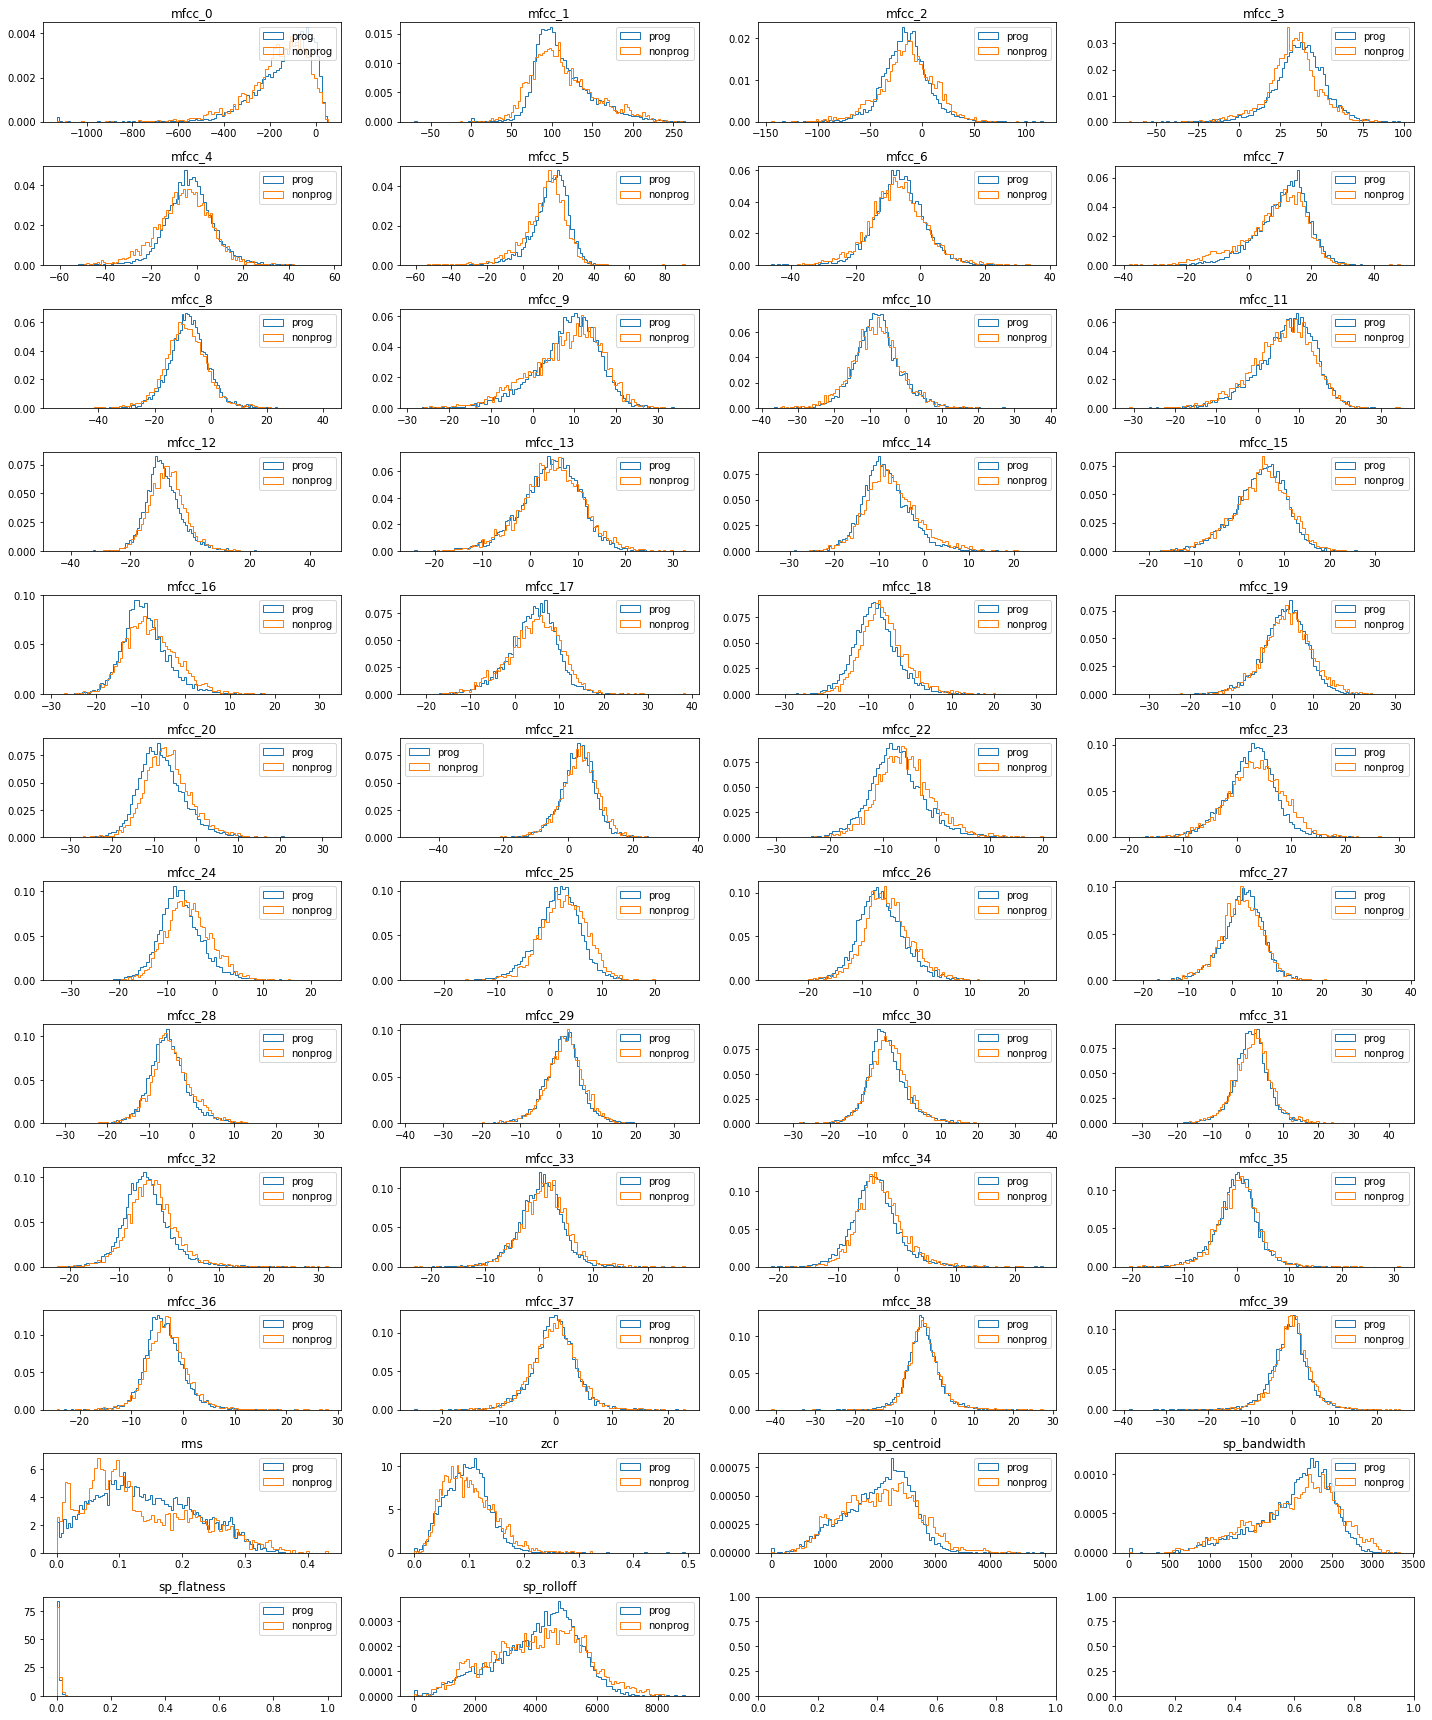

In [29]:
features = data.columns[3:]
ncols = 4
nrows = int(np.ceil(len(features) / ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*5, nrows*2))
for feat, ax in zip(features, np.ravel(axes)):
    ax.hist(data[data.target == 1][feat], bins=100, density=True, histtype='step', label='prog')
    ax.hist(data[data.target == 0][feat], bins=100, density=True, histtype='step', label='nonprog')
    ax.set_title(feat)
    ax.legend()
fig.tight_layout()
plt.show()

In [30]:
data.target.mean()

0.6365114686751112

In [33]:
prog_frac = data.target.mean()
prog = data[data.target == 1]
nonprog = data[data.target == 0]
pd.concat([prog.sample(frac=(1 - prog_frac)/prog_frac), nonprog], ignore_index=True).to_csv('train2_balanced.csv', index=False)

In [34]:
prog.target.mean()

1.0